In [1]:
# Calculations of accretion rates for Bondi-Hoyle-Lyttleton (BHL) 
# accretion model used in reference papaer M. Ricotti et al. 
# https://arxiv.org/abs/0709.0524 and Park Ricotti Model (PR)
# accretion model as per F. Scarcella et al. 2020, 
# https://arxiv.org/abs/2012.10421 . 


# Here, the value of the speed of sound in the ioinized region of 
# PR Model is chosen as c_s,in = 25 c_s. c_s,in is the free parameter 
# of PR accretion Model.


# The values of v_pbh, c_s and v_eff are used as per 
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524
 

# Here,  v_eff = v_eff,A as mentioned in
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524



from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from PRaccretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


def c_s(z):
    return c_s_Ricotti(z)

def v_pbh(z):
    return v_rel_digitized_Ricotti(z)

def v_eff(z):
    return v_eff_Ricotti(z)

def x_e(z):
    if z < z_rec:
        return e_fraction
    else:
        return 1
    


    
    
# BHL accretion Model around isolated PBHs 
def r_B_pbh(z, m):
    return (G * m)/(v_eff(z)**2)







# BHL accretion Model in the presence of DM halos around isolated PBHs  
def r_h(z, m):
    return r_ta(z, m)

def M_halo(z, m):
    return M_halo94(z, m)

alpha = 9/4
p = 3 - alpha 


 
def r_B_halo(z, m):
    return  (G * M_halo(z, m))/(v_eff(z)**2)




def r_B_eff(z, m):
    r_B_pbh_var = r_B_pbh(z, m)
    if r_h(z, m) <= r_B_halo(z, m):
        r_B_eff_var = r_B_halo(z, m)
    else:
        r_B_eff_var = r_h(z, m) * (((1-p) * (r_h(z, m)/r_B_halo(z, m)) + p)**(1/(p-1)))
    if r_B_eff_var < r_B_pbh_var:
         return r_B_pbh(z, m)
    else:
         return r_B_eff_var
        



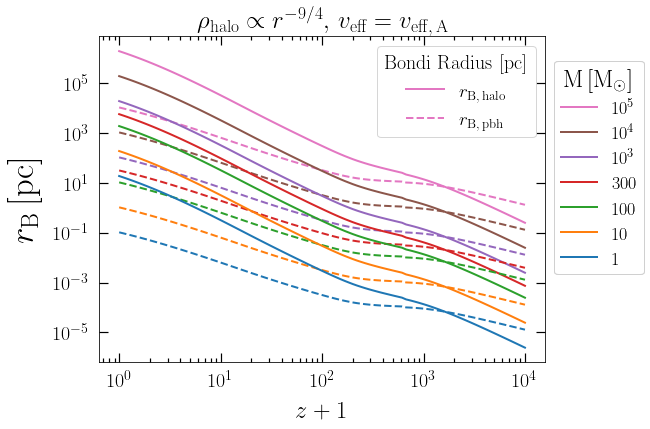

In [2]:
colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)


r_B_pbh_arr = np.zeros(len(z_arr))
r_B_halo_arr = np.zeros(len(z_arr))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        r_B_pbh_arr[j] = r_B_pbh(z, m)
        r_B_halo_arr[j] = r_B_halo(z, m)
    ax.loglog(z_arr, r_B_halo_arr, color = color)
    ax.loglog(z_arr, r_B_pbh_arr, color = color, ls = '--')
    

    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["$r_\mathrm{B, \,halo}$","$r_\mathrm{B, \,pbh}$"], title = 'Bondi Radius $ \mathrm{[pc]}$',
        title_fontsize = 20, loc = 'upper right', prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 24, loc = (1.02, 0.27), prop = {"size":18})
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.xlabel('$z+1$', fontsize = 24.5, labelpad = 10)
plt.ylabel(r"$r_\mathrm{B}\, \mathrm{[pc]}$ ", fontsize = 35, labelpad = 11)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title(r'$\rho_\mathrm{halo} \propto r^{-9/4}, \, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('r_B_halo.pdf', bbox_inches = 'tight')
plt.show()


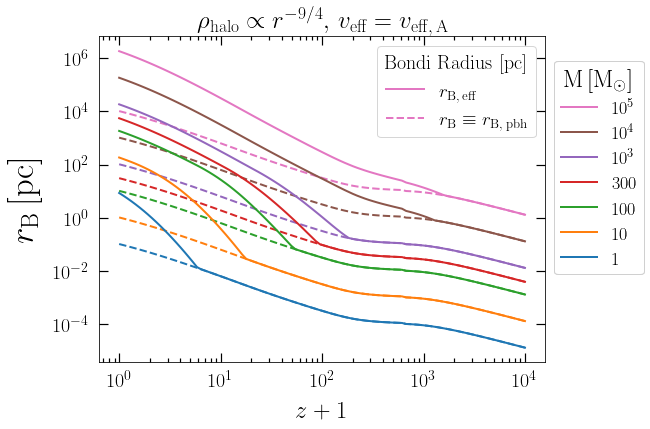

In [3]:
colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)


r_B_pbh_arr = np.zeros(len(z_arr))
r_B_eff_arr = np.zeros(len(z_arr))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        r_B_pbh_arr[j] = r_B_pbh(z, m)
        r_B_eff_arr[j] = r_B_eff(z, m)
    ax.loglog(z_arr, r_B_eff_arr, color = color)
    ax.loglog(z_arr, r_B_pbh_arr, color = color, ls = '--')
    

    

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["$r_\mathrm{B, \,eff}$","$r_\mathrm{B}\equiv r_\mathrm{B, \,pbh}$"], title = 'Bondi Radius $ \mathrm{[pc]}$',
        title_fontsize = 20, loc = 'upper right', prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 24, loc = (1.02, 0.27), prop = {"size":18})
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.xlabel('$z+1$', fontsize = 24.5, labelpad = 10)
plt.ylabel(r"$r_\mathrm{B}\, \mathrm{[pc]}$ ", fontsize = 35, labelpad = 11)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title(r'$\rho_\mathrm{halo} \propto r^{-9/4}, \, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('r_B_BHL_eff.pdf', bbox_inches = 'tight')
plt.show()
